In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the data
file_path = r"C:\Users\Lenovo\OneDrive - University of Leeds\Project\mimic-iv-clinical-database-demo-2.2\mimic-iv-clinical-database-demo-2.2\admissions.csv"
admissions_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(admissions_df.head())

# Display the total number of missing values in each column
missing_data = admissions_df.isnull().sum()
print("\nMissing data in each column:")
print(missing_data)


First few rows of the dataset:
   subject_id   hadm_id            admittime            dischtime  \
0    10004235  24181354  2196-02-24 14:38:00  2196-03-04 14:02:00   
1    10009628  25926192  2153-09-17 17:08:00  2153-09-25 13:20:00   
2    10018081  23983182  2134-08-18 02:02:00  2134-08-23 19:35:00   
3    10006053  22942076  2111-11-13 23:39:00  2111-11-15 17:20:00   
4    10031404  21606243  2113-08-04 18:46:00  2113-08-06 20:57:00   

             deathtime admission_type admit_provider_id  \
0                  NaN         URGENT            P03YMR   
1                  NaN         URGENT            P41R5N   
2                  NaN         URGENT            P233F6   
3  2111-11-15 17:20:00         URGENT            P38TI6   
4                  NaN         URGENT            P07HDB   

       admission_location        discharge_location insurance language  \
0  TRANSFER FROM HOSPITAL  SKILLED NURSING FACILITY  Medicaid  ENGLISH   
1  TRANSFER FROM HOSPITAL          HOME HEALTH CARE

In [28]:

# Additional summary of missing data
missing_summary = admissions_df.isnull().sum().reset_index()
missing_summary.columns = ['Column', 'Missing Values']
missing_summary['Percentage'] = (missing_summary['Missing Values'] / admissions_df.shape[0]) * 100
print("\nSummary of missing data:")
print(missing_summary)



Summary of missing data:
                  Column  Missing Values  Percentage
0             subject_id               0    0.000000
1                hadm_id               0    0.000000
2              admittime               0    0.000000
3              dischtime               0    0.000000
4              deathtime             260   94.545455
5         admission_type               0    0.000000
6      admit_provider_id               0    0.000000
7     admission_location               0    0.000000
8     discharge_location              42   15.272727
9              insurance               0    0.000000
10              language               0    0.000000
11        marital_status              12    4.363636
12                  race               0    0.000000
13             edregtime              93   33.818182
14             edouttime              93   33.818182
15  hospital_expire_flag               0    0.000000


In [29]:
admissions_df.drop(['hospital_expire_flag'], axis=1, inplace=True)

In [30]:

# Additional summary of missing data
missing_summary = admissions_df.isnull().sum().reset_index()
missing_summary.columns = ['Column', 'Missing Values']
missing_summary['Percentage'] = (missing_summary['Missing Values'] / admissions_df.shape[0]) * 100
print("\nSummary of missing data:")
print(missing_summary)



Summary of missing data:
                Column  Missing Values  Percentage
0           subject_id               0    0.000000
1              hadm_id               0    0.000000
2            admittime               0    0.000000
3            dischtime               0    0.000000
4            deathtime             260   94.545455
5       admission_type               0    0.000000
6    admit_provider_id               0    0.000000
7   admission_location               0    0.000000
8   discharge_location              42   15.272727
9            insurance               0    0.000000
10            language               0    0.000000
11      marital_status              12    4.363636
12                race               0    0.000000
13           edregtime              93   33.818182
14           edouttime              93   33.818182


In [31]:
import numpy as np
from datetime import datetime, timedelta
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer


In [32]:
# Function to generate random datetime within a range and format it
def generate_random_datetime(start, end):
    random_date = start + (end - start) * np.random.rand()
    return random_date.strftime('%d/%m/%Y %H:%M')

# Define the range for the random datetime
start_date = datetime(2100, 1, 1)
end_date = datetime(2200, 12, 31)

# Generate random datetime data for 'admittime' and 'dischtime'
admissions_df['admittime'] = [generate_random_datetime(start_date, end_date) for _ in range(len(admissions_df))]
admissions_df['dischtime'] = [generate_random_datetime(start_date, end_date) for _ in range(len(admissions_df))]



In [33]:
# Define the metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=admissions_df)

# Modify the metadata to handle datetime fields appropriately
metadata.update_column('admittime', sdtype='datetime', datetime_format='%d/%m/%Y %H:%M')
metadata.update_column('dischtime', sdtype='datetime', datetime_format='%d/%m/%Y %H:%M')



C:\Users\Lenovo\anaconda3\Lib\site-packages\sdv\_utils.py:47: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return _guess_datetime_format_for_array(value)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sdv\_utils.py:47: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return _guess_datetime_format_for_array(value)


In [34]:
# Initialize the CTGAN synthesizer
synthesizer = CTGANSynthesizer(metadata)

# Fit the synthesizer on the real data
synthesizer.fit(admissions_df)

# Generate synthetic data
synthetic_data = synthesizer.sample(1000)  # Generate 1000 synthetic rows


C:\Users\Lenovo\anaconda3\Lib\site-packages\sdv\single_table\base.py:92: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [35]:
# Update the 'subject_id' to start from 400000
synthetic_data['subject_id'] = range(400000, 400000 + len(synthetic_data))
synthetic_data['hadm_id'] = synthetic_data['subject_id'].apply(lambda x: f"{x}{str(synthetic_data.index.get_loc(synthetic_data.index[synthetic_data['subject_id'] == x][0])).zfill(2)}")



In [36]:
# Define the function to assign religion based on percentages
def assign_religion():
    r = np.random.rand()
    if r < 0.825:
        return "Muslim"
    elif r < 0.965:
        return "Jewish"
    elif r < 0.99:
        return "Christian"
    else:
        return "Other religious minorities include Palestinian Metawalis, Palestinian Druze, and Palestinian Baha'is."



In [37]:
# Define the function to assign languages based on percentages
def assign_language():
    r = np.random.rand()
    if r < 0.96:
        return "Arabic"
    else:
        return "Hebrew"


In [38]:

# Apply the religion function to the synthetic data
synthetic_data['race'] = synthetic_data.apply(lambda _: assign_religion(), axis=1)

# Apply the language function to the synthetic data
synthetic_data['language'] = synthetic_data.apply(lambda _: assign_language(), axis=1)


In [39]:
synthetic_data.to_csv('synthetic_admissions.csv', index=False)

print(synthetic_data.head())
print("Synthetic data generated, updated, and saved successfully.")


   subject_id   hadm_id         admittime         dischtime deathtime  \
0      400000  40000000  25/06/2170 00:10  03/11/2126 06:15       NaN   
1      400001  40000101  03/07/2176 23:40  22/09/2200 14:08       NaN   
2      400002  40000202  26/03/2105 04:14  19/01/2170 15:56       NaN   
3      400003  40000303  13/12/2127 20:59  19/12/2113 03:54       NaN   
4      400004  40000404  04/02/2106 08:20  30/06/2100 03:36       NaN   

                admission_type admit_provider_id      admission_location  \
0  SURGICAL SAME DAY ADMISSION     sdv-pii-h6qup          EMERGENCY ROOM   
1                     EW EMER.     sdv-pii-7r2xw          EMERGENCY ROOM   
2  SURGICAL SAME DAY ADMISSION     sdv-pii-zwba1          EMERGENCY ROOM   
3  SURGICAL SAME DAY ADMISSION     sdv-pii-h9c8o          EMERGENCY ROOM   
4                     EW EMER.     sdv-pii-o1xff  TRANSFER FROM HOSPITAL   

         discharge_location insurance language marital_status    race  \
0                       NaN  Me

In [40]:
missing_data1 = synthetic_data.isnull().sum()
print("\nMissing data in each column:")
print(missing_data1)


Missing data in each column:
subject_id              0
hadm_id                 0
admittime               0
dischtime               0
deathtime             950
admission_type          0
admit_provider_id       0
admission_location      0
discharge_location    139
insurance               0
language                0
marital_status         63
race                    0
edregtime             323
edouttime             315
dtype: int64


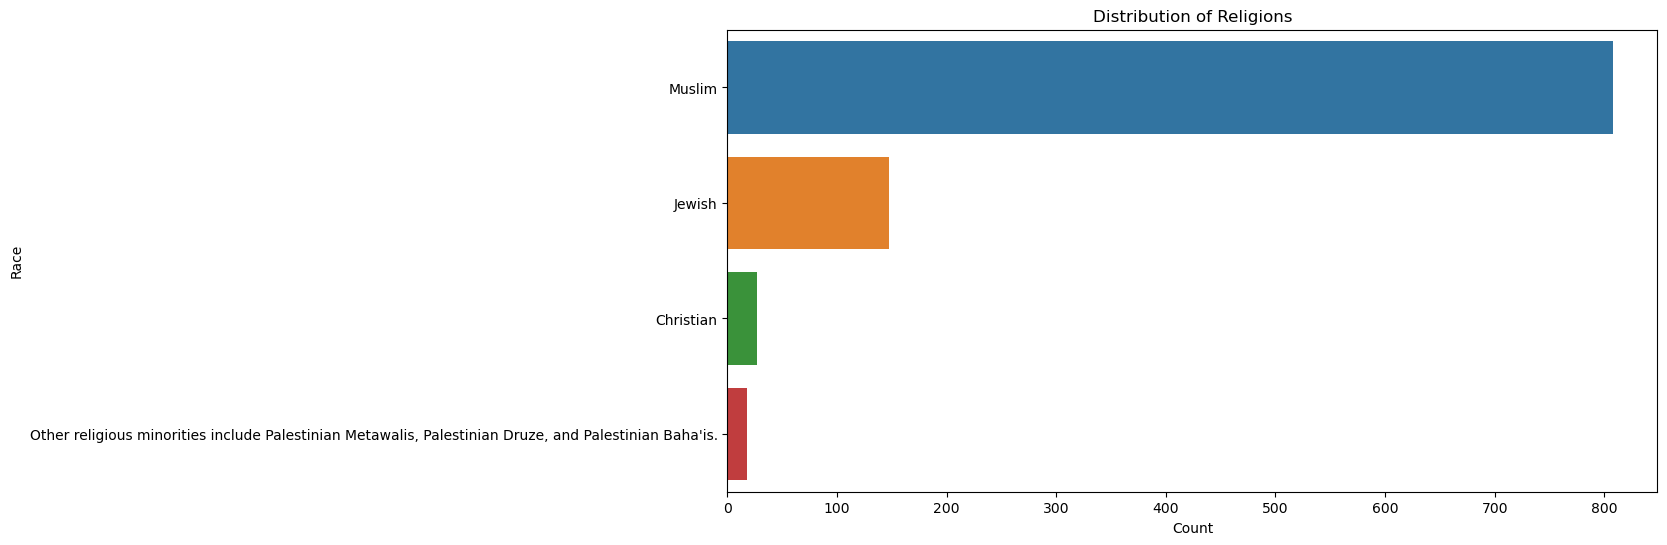

In [41]:
# Visualize the distribution of the 'religions' column
plt.figure(figsize=(12, 6))
sns.countplot(data=synthetic_data, y='race', order=synthetic_data['race'].value_counts().index)
plt.title('Distribution of Religions')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()


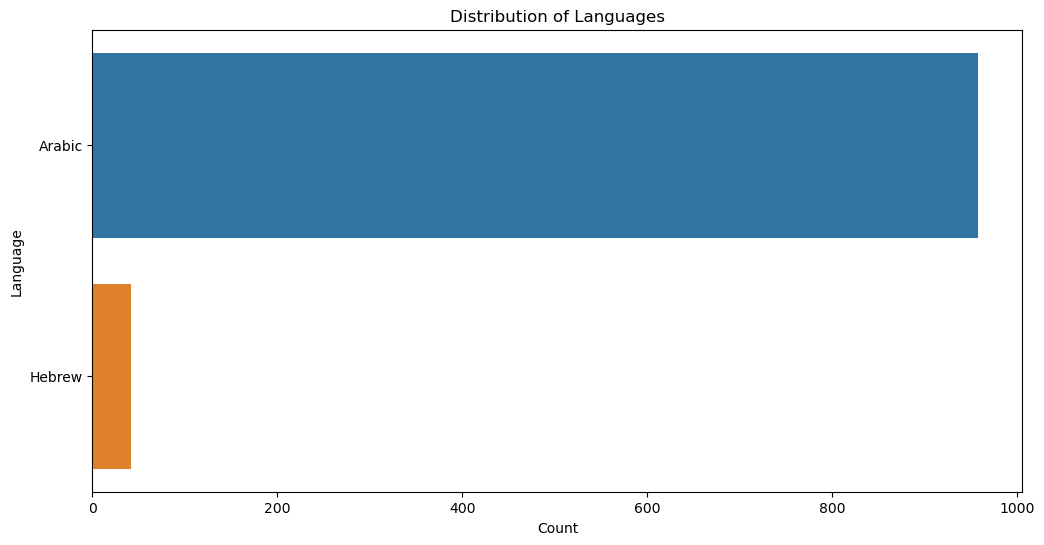

In [42]:

# Visualize the distribution of the 'languages' column
plt.figure(figsize=(12, 6))
sns.countplot(data=synthetic_data, y='language', order=synthetic_data['language'].value_counts().index)
plt.title('Distribution of Languages')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

In [43]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=admissions_df,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |████████████████████████████████████████████████████| 15/15 [00:00<00:00, 994.23it/s]|
Data Validity Score: 78.57%

(2/2) Evaluating Data Structure: |█████████████████████████████████████████████████████| 1/1 [00:00<00:00, 333.20it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 89.29%



In [44]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    admissions_df,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |████████████████████████████████████████████████████| 15/15 [00:00<00:00, 784.63it/s]|
Column Shapes Score: 60.42%

(2/2) Evaluating Column Pair Trends: |██████████████████████████████████████████████| 105/105 [00:01<00:00, 78.72it/s]|
Column Pair Trends Score: 51.35%

Overall Score (Average): 55.89%



In [45]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,subject_id,KSComplement,0.000000e+00
1,admittime,KSComplement,7.023636e-01
2,dischtime,KSComplement,8.044545e-01
3,deathtime,KSComplement,4.600000e-01
4,admission_type,TVComplement,9.387273e-01
5,admission_location,TVComplement,9.114545e-01
6,discharge_location,TVComplement,9.380947e-01
7,insurance,TVComplement,9.371818e-01
8,language,TVComplement,7.272727e-09
9,marital_status,TVComplement,9.614740e-01


In [47]:
# Define the thresholds
thresholds = {
    'KSComplement': 0.7,
    'TVComplement': 0.7,
    'critical_columns': {
        'admittime': 0.8,
        'dischtime': 0.8,
        'admission_type': 0.9,
        'admission_location': 0.9,
        'discharge_location': 0.9,
        'insurance': 0.9,
        'marital_status': 0.9,
    },
    'non_critical_columns': {
        'subject_id': 0.0,
        'language': 0.0,
        'race': 0.0,
        'edregtime': 0.7,
        'edouttime': 0.7,
    }
}

# Sample quality report details (mimicking your data structure)
quality_report_details = [
    {'Column': 'subject_id', 'Metric': 'KSComplement', 'Score': 0.0},
    {'Column': 'admittime', 'Metric': 'KSComplement', 'Score': 0.7023636},
    {'Column': 'dischtime', 'Metric': 'KSComplement', 'Score': 0.8044545},
    {'Column': 'deathtime', 'Metric': 'KSComplement', 'Score': 0.46},
    {'Column': 'admission_type', 'Metric': 'TVComplement', 'Score': 0.9387273},
    {'Column': 'admission_location', 'Metric': 'TVComplement', 'Score': 0.9114545},
    {'Column': 'discharge_location', 'Metric': 'TVComplement', 'Score': 0.9380947},
    {'Column': 'insurance', 'Metric': 'TVComplement', 'Score': 0.9371818},
    {'Column': 'language', 'Metric': 'TVComplement', 'Score': 7.272727e-09},
    {'Column': 'marital_status', 'Metric': 'TVComplement', 'Score': 0.9614740},
    {'Column': 'race', 'Metric': 'TVComplement', 'Score': 1.454545e-08},
    {'Column': 'edregtime', 'Metric': 'KSComplement', 'Score': 0.6073759},
    {'Column': 'edouttime', 'Metric': 'KSComplement', 'Score': 0.5940430},
]

# Function to check if columns meet the threshold
def check_thresholds(quality_report_details, thresholds):
    for column_detail in quality_report_details:
        column_name = column_detail['Column']
        metric = column_detail['Metric']
        score = column_detail['Score']

        if column_name in thresholds['critical_columns']:
            threshold = thresholds['critical_columns'][column_name]
        else:
            threshold = thresholds['non_critical_columns'].get(column_name, thresholds[metric])

        if score >= threshold:
            print(f"{column_name} meets the threshold with a score of {score:.2e}.")
        else:
            print(f"{column_name} does not meet the threshold. Score: {score:.2e}, Threshold: {threshold:.2e}")

# Call the function with the sample data
check_thresholds(quality_report_details, thresholds)


subject_id meets the threshold with a score of 0.00e+00.
admittime does not meet the threshold. Score: 7.02e-01, Threshold: 8.00e-01
dischtime meets the threshold with a score of 8.04e-01.
deathtime does not meet the threshold. Score: 4.60e-01, Threshold: 7.00e-01
admission_type meets the threshold with a score of 9.39e-01.
admission_location meets the threshold with a score of 9.11e-01.
discharge_location meets the threshold with a score of 9.38e-01.
insurance meets the threshold with a score of 9.37e-01.
language meets the threshold with a score of 7.27e-09.
marital_status meets the threshold with a score of 9.61e-01.
race meets the threshold with a score of 1.45e-08.
edregtime does not meet the threshold. Score: 6.07e-01, Threshold: 7.00e-01
edouttime does not meet the threshold. Score: 5.94e-01, Threshold: 7.00e-01
